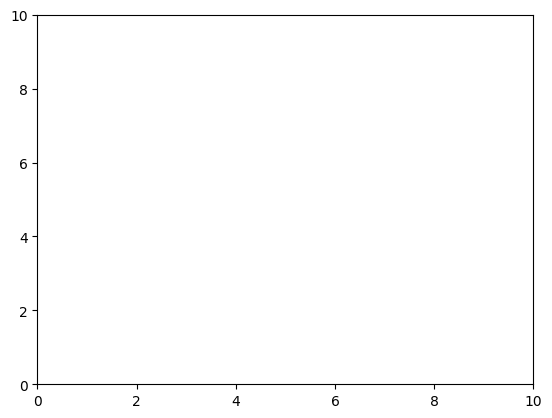

[]


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

class LineDrawer:
    def __init__(self, ax):
        self.ax = ax
        self.start_point = None
        self.graph = []
        self.points_dict = {}
        self.vertices = 0
        self.tolerance = 0.2

        self.cid_press = ax.figure.canvas.mpl_connect('button_press_event', self.on_click)

    def dist(self, x1, y1, x2, y2):
        return ((x1-x2)**2 + (y1-y2)**2)**(1/2)

    def get_closest(self, x, y):
        # find closest vertex
        min_dist = float('inf')
        min_vertex = None
        for k, v in self.points_dict.items():
            dist = self.dist(x, y, *v)
            if dist < min_dist:
                min_vertex = k
                min_dist = dist
        # latch to it if its close enough
        if min_dist < self.tolerance:
            return min_vertex
        else:
            point = self.vertices
            self.vertices += 1
            self.graph.append([[], []])
            self.points_dict[point] = (x, y)

            return point

    def on_click(self, event):
        if event.button == 1:
            self.on_left_click(event)
        elif event.button == 3:
            self.on_right_click(event)

    def insert_sorted(self, to, ins):
        # 0 = in, 1 = out
        if not self.graph[to]:
            if self.points_dict[to][1] < self.points_dict[ins][1]:
                self.graph[to][0].append(ins)
            else:
                self.graph[to][1].append(ins)
        else:
            if self.points_dict[to][1] < self.points_dict[ins][1]:
                out = False
            else:
                out = True

            ins_x = self.points_dict[ins][0]
            for i, v in enumerate(self.graph[to][out]):
                if ins_x < self.points_dict[v][0]:
                    self.graph[to][out].insert(i, ins)
                    break
            else:
                self.graph[to][out].append(ins)


    def on_left_click(self, event):
        new_start = self.get_closest(event.xdata, event.ydata)
        print(new_start)
        if self.start_point is not None:
            x0, y0 = self.points_dict[self.start_point]
            x1, y1 = self.points_dict[new_start]
            print(x0, y0, x1, y1)

            line = Line2D([x0, x1], [y0, y1], color='blue', lw=2, picker=True)
            self.insert_sorted(self.start_point, new_start)
            self.insert_sorted(new_start, self.start_point)
            self.ax.add_line(line)

            self.start_point = (x1, y1)

            self.ax.figure.canvas.draw()
        self.start_point = new_start

    def on_right_click(self, event):
        self.start_point = None


fig, ax = plt.subplots()
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

drawer = LineDrawer(ax)
plt.show()
print(drawer.graph)
points_dict = drawer.points_dict

In [ ]:
graph = [
[1, 3, 2],
[0, 6],
[0, 3, 4],
[0, 2, 6, 5, 4],
[3, 2, 5, 8, 7],
[3, 4, 6, 8],
[1, 3, 5, 8],
[4, 8],
[6,5,4,7]
]
graph_list = [
    # IN
    [[],
    [0],
    [0],
    [0, 2],
    [3, 2],
    [3, 4],
    [1, 3, 5],
    [4],
    [6,5,4,7]],
    # OUT
    [[1, 3, 2],
    [6],
    [3, 4],
    [6, 5, 4],
    [5, 8, 7],
    [6, 8],
    [8],
    [8],
    []]

]

graph_list2 = [[[], [1, 3, 2]], [[0], [6]], [[0], [3, 4]], [[0, 2], [6, 5, 4]], [[3, 2], [5, 8, 7]], [[3, 4], [6, 8]], [[1, 5, 3], [8]], [[4], [8]], [[6, 5, 4, 7], []]]
points_dict = {0: (5.435483870967742, 8.982683982683982), 1: (1.7419354838709675, 7.900432900432901), 2: (7.661290322580644, 7.2943722943722955), 3: (5.548387096774194, 5.9523809523809526), 4: (7.661290322580644, 4.5021645021645025), 5: (5.225806451612904, 3.8311688311688314), 6: (1.8870967741935485, 2.22943722943723), 7: (7.241935483870968, 1.1688311688311692), 8: (4.612903225806452, 0.6709956709956713)}




In [ ]:
sorted_vertices = sorted(points_dict.items(), key=lambda item: item[1][1])
sorted_vertices = [key for key, _ in sorted_vertices]

In [ ]:
def generate_weights(G_list):
    n = len(G_list)
    IN = [a for a, b in G_list]
    OUT = [b for a, b in G_list]

    W = [[1 for _ in range(n)] for _ in range(n)]

    # first loop
    for i in range(n):
        W_IN = 0
        for el in IN[i]:
            W_IN += W[el][i]
        W_OUT = 0
        for el in OUT[i]:
            W_OUT += W[i][el]
        if len(OUT[i]) > 0 and W_IN > W_OUT:
            u = OUT[i][0]
            W[i][u] += W_IN - W_OUT

    # second loop
    for i in range(n-1, -1, -1):
        W_IN = 0
        for el in IN[i]:
            W_IN += W[i][el]
        W_OUT = 0
        for el in OUT[i]:
            W_OUT += W[i][el]
        if len(IN[i]) > 0 and W_OUT > W_IN:
            u = IN[i][0]
            W[u][i] += W_OUT - W_IN

    result_G = [[[] for _ in range(n)] for _ in range(2)]
    for i in range(n):
        for el in IN[i]:
            result_G[0][i].append((el, W[el][i]))
        for el in OUT[i]:
            result_G[1][i].append((el, W[i][el]))
    return result_G

In [ ]:
#test
res = generate_weights(graph_list2)
print("IN:")
for i, row in enumerate(res[0]):
    print(i, end=": ")
    print(row)
print("OUT: ")
for i, row in enumerate(res[1]):
    print(i, end=": ")
    print(row)

# print(res)

IN:
0: []
1: [(0, 1)]
2: [(0, 2)]
3: [(0, 3), (2, 1)]
4: [(3, 2), (2, 1)]
5: [(3, 1), (4, 1)]
6: [(1, 1), (5, 1), (3, 1)]
7: [(4, 1)]
8: [(6, 3), (5, 1), (4, 1), (7, 1)]
OUT: 
0: [(1, 1), (3, 3), (2, 2)]
1: [(6, 1)]
2: [(3, 1), (4, 1)]
3: [(6, 1), (5, 1), (4, 2)]
4: [(5, 1), (8, 1), (7, 1)]
5: [(6, 1), (8, 1)]
6: [(8, 3)]
7: [(8, 1)]
8: []


In [ ]:
def generate_separators(G_list):
    OUT = G_list[1]
    n = len(G_list[1])
    separators = []
    while len(OUT[0]) > 0:
        path = [0]
        pivot = 0
        while pivot != n-1:
            new_pivot, weight = OUT[pivot][0]
            path.append(new_pivot)
            if weight > 1:
                OUT[pivot][0] = (new_pivot, weight-1)
            else:
                OUT[pivot].pop(0)
            pivot = new_pivot
        separators.append(path)
    return separators

In [ ]:
# test
weights = generate_weights(graph_list2)
separators = generate_separators(weights)
print(separators)
print(len(separators))

[[0, 1, 6, 8], [0, 3, 6, 8], [0, 3, 5, 6, 8], [0, 3, 4, 5, 8], [0, 2, 3, 4, 8], [0, 2, 4, 7, 8]]
6


In [ ]:
class Node:
  def __init__(self, val, index):
    self.left = None
    self.right = None
    self.index = index
    self.edges = val

  def __repr__(self):
    return str(self.index) + " " + str(self.edges)

class BST:
  def __init__(self):
    self.root = None

  def get_edges(self, separator, visited):
    edges = []
    for i in range(len(separator)-1):
      if ((separator[i], separator[i+1]) not in visited) or True:
        edges.append((separator[i], separator[i+1]))
    return edges

  def make_tree(self, separators):
    self.root = self._make_tree(separators, [], 0)

  def _make_tree(self, separators, visited, left):
    if len(separators) == 0:
      return None

    center_idx = len(separators)//2
    edges = self.get_edges(separators[center_idx], visited)
    node = Node(edges, left+center_idx+1)
    node.left = self._make_tree(separators[:center_idx], visited + edges, left)
    node.right = self._make_tree(separators[center_idx+1:], visited + edges, center_idx+1)
    return node

  def print_tree(self):
    print('ROOT '+str(self.root))
    def _print_tree(node, level):
        if node.left is not None:
            print('    '*level + 'LEFT ' + str(node.left))
            _print_tree(node.left, level+1)
        if node.right is not None:
            print('    '*level + 'RIGHT ' + str(node.right))
            _print_tree(node.right, level+1)
    if self.root is not None:
        _print_tree(self.root, 1)


tree = BST()
separators = [[0,1,6,8],[0,3,6,8],[0,3,5,6,8],[0,3,4,5,8],[0,2,3,4,8],[0,2,4,7,8]]
tree.make_tree(separators)
tree.print_tree()



ROOT 4 [(0, 3), (3, 4), (4, 5), (5, 8)]
    LEFT 2 [(0, 3), (3, 6), (6, 8)]
        LEFT 1 [(0, 1), (1, 6), (6, 8)]
        RIGHT 3 [(0, 3), (3, 5), (5, 6), (6, 8)]
    RIGHT 6 [(0, 2), (2, 4), (4, 7), (7, 8)]
        LEFT 5 [(0, 2), (2, 3), (3, 4), (4, 8)]


In [ ]:
def mat_det_2x2(a, b, c):
    return (a[0]-c[0])*(b[1]-c[1]) - (a[1]-c[1])*(b[0]-c[0])


In [ ]:
def bin_search(point, separator):
  a = 0
  b = len(separator)
  while b - a > 0:
    middle = (b+a)//2
    node1 = points_dict[separator[middle][0]]
    node2 = points_dict[separator[middle][1]]
    if node1[1] > node2[1]:
      node1, node2 = node2, node1
    if node2[1] < point[1]:
      b = middle
    elif node2[1] > point[1] and node1[1] < point[1]:
      return middle
    else:
      a = middle + 1
  return None

In [ ]:
def sep_search(point, node, last):
    print("INDEX", node.index)
    separator = node.edges
    i = bin_search(point, separator)
    print(i)
    if i == None:
        orient = last
    else:
        orient = -mat_det_2x2(points_dict[separator[i][0]], points_dict[separator[i][1]], point)
    print(orient)
    if orient < 0:
        if node.right == None:
            return (node.index, node.index+1)
        else:
            return sep_search(point, node.right, -1)
    else:
        if node.left == None:
            return (node.index-1, node.index)
        else:
            return sep_search(point, node.left, 1)

In [ ]:
print(sep_search((5, 8), tree.root, None))

INDEX 4
0
1.4305962854349952
INDEX 2
0
1.4305962854349952
INDEX 1
0
-3.158287948610527
(1, 2)


In [ ]:
def get_region(point, separator1, separator2):
  pointer1 = 0
  pointer2 = 0
  left = [0]
  right = [0]

  while True:
    print(pointer1, pointer2, left, right)
    if separator1[pointer1] == separator2[pointer2]:
      if points_dict[separator1[pointer1]][1] < point[1]:
        return right + list(reversed(left[1:-1]))
      else:
        left = [separator1[pointer1], separator1[pointer1+1]]
        right = [separator2[pointer2]]
        pointer1 += 1
    if points_dict[separator1[pointer1]][1] > points_dict[separator2[pointer2]][1]:
      pointer1 += 1
      left.append(separator1[pointer1])
    else:
      pointer2 += 1
      right.append(separator2[pointer2])

print(get_region((7, 5.8), separators[4], separators[5]))

0 0 [0] [0]
1 1 [0, 2] [0, 2]
2 2 [2, 3] [2, 4]
3 2 [2, 3, 4] [2, 4]
[2, 4, 3]


In [ ]:
from math import inf

EPS = 10**(-9)
class Line:
    def __init__(self, start, end):
        self.start = start
        self.end = end
        if self.end[0] != self.start[0]:
            self.a = (self.end[1] - self.start[1]) / (self.end[0] - self.start[0])
            self.b = self.start[1] - self.a * self.start[0]
        else:
            self.a = None
            self.b = self.start[0]

    def __repr__(self):
        if self.a is None:
            return f'Line({self.b})'
        else:
            return f'Line({self.start}, {self.end})'


class Section:
    def __init__(self, helper, left, right):
        self.helper = helper
        self.left = left
        self.right = right
        self.mustConnect = []

    def __repr__(self):
        return str(self.helper) + " : [" + str(self.left) + " > " + str(self.right) + "]"

    def calc_X(self, Y):

        if self.left.a is None:
            leftBound = self.left.b
        elif self.left.a == 0:
            leftBound = self.left.b
        else:
            leftBound = (Y - self.left.b) / self.left.a
        if self.right.a is None:
            rightBound = self.right.b
        elif self.right.a == 0:
            rightBound = self.right.b
        else:
            rightBound = (Y - self.right.b) / self.right.a
        return (leftBound, rightBound)

    def contains_point(self, point):
        bounds = self.calc_X(point[1])
        if point[0] > bounds[0] and point[0] <= bounds[1] + EPS:
            return 0
        elif point[0] <= bounds[0]:
            return -1
        return 1


def orient(a, b, c):
    return (a[0] - c[0]) * (b[1] - c[1]) - (a[1] - c[1]) * (b[0] - c[0])


def cmp(pivot, a, b):
    return -orient(pivot, a, b)


def bin_search(sections, point):
    L, R = 0, len(sections) - 1
    while L < R:
        M = (L + R) // 2
        val = sections[M].contains_point(point)
        if val == 0:
            return M

        elif val == -1:
            R = M
        else:
            L = M + 1
    return L


# g_dict jest posortowany względem Y
def sweep(g_dict, g_in, g_out):
    added_edges = set()
    sections = []
    n = len(g_in)
    left = Line((-inf, inf), (-inf, -inf))
    right = Line(g_dict[0], g_dict[g_out[0][0]])
    new_section = Section(0, left, right)
    sections.append(new_section)
    for i in range(len(g_out[0]) - 1):
        left = sections[i-1].right
        right = Line(g_dict[0], g_dict[g_out[0][i + 1]])
        new_section = Section(0, left, right)
        sections.append(new_section)
    left = Line(g_dict[0], g_dict[g_out[0][-1]])
    right = Line((inf, inf), (inf, -inf))
    new_section = Section(0, left, right)
    sections.append(new_section)
    # print("sections", sections)
    for i in range(1, n - 1):
        # print("i", i)
        IN = len(g_in[i])
        OUT = len(g_out[i])
        # print("IN, OUT", IN, OUT)
        ind = bin_search(sections, g_dict[i])
        # print("ind", ind)
        # print("cont: ", sections[ind].contains_point(g_dict[i]))
        # print("bound")
        if IN == 0:
            added_edges.add((sections[ind].helper, i))
            # print("!!!!!!!!!")
        for _ in range(IN + 1):
            s = sections.pop(ind)
            for a in s.mustConnect:
                added_edges.add((a, i))

        if OUT == 0:
            if ind != 0:
                left = sections[ind - 1].right
            else:
                left = Line((-inf, inf), (-inf, -inf))

            if ind != len(sections):
                right = sections[ind].left
            else:
                right = Line((inf, inf), (inf, -inf))
            new_section = Section(i, left, right)
            new_section.mustConnect.append(i)
            sections.insert(ind, new_section)
        if OUT > 0:
            if ind != 0:
                left = sections[ind - 1].right
            else:
                left = Line((-inf, inf), (-inf, -inf))
            right = Line(g_dict[i], g_dict[g_out[i][0]])
            new_section = Section(i, left, right)
            sections.insert(ind, new_section)
            ind += 1
            for j in range(1, OUT):
                left = sections[ind - 1].right
                right = Line(g_dict[i], g_dict[g_out[i][j]])
                new_section = Section(i, left, right)
                sections.insert(ind, new_section)
                ind += 1
            if ind < len(sections):
                left = sections[ind - 1].right
                right = sections[ind].left
                new_section = Section(i, left, right)
                sections.insert(ind, new_section)
            else:
                left = sections[ind - 1].right
                right = Line((inf, -inf), (inf, inf))
                new_section = Section(i, left, right)
                sections.insert(ind, new_section)
    IN = len(g_in[-1])
    for _ in range(IN + 1):
        s = sections.pop(0)
        for a in s.mustConnect:
            added_edges.add((a, n - 1))
    return added_edges
